In [1]:
# importing required libraries
import requests                     
import matplotlib.pyplot as plt      
import json                          
import pandas as pd
import seaborn as sns

In [2]:
# Step 1: Fetch data from API

API_URL = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/students.json"

response = requests.get(API_URL)

data = [json.loads(line) for line in response.text.splitlines()]

In [3]:
len(data)

200

In [4]:
print(data)

[{'_id': 0, 'name': 'aimee Zank', 'scores': [{'score': 1.463179736705023, 'type': 'exam'}, {'score': 11.78273309957772, 'type': 'quiz'}, {'score': 35.8740349954354, 'type': 'homework'}]}, {'_id': 1, 'name': 'Aurelia Menendez', 'scores': [{'score': 60.06045071030959, 'type': 'exam'}, {'score': 52.79790691903873, 'type': 'quiz'}, {'score': 71.76133439165544, 'type': 'homework'}]}, {'_id': 2, 'name': 'Corliss Zuk', 'scores': [{'score': 67.03077096065002, 'type': 'exam'}, {'score': 6.301851677835235, 'type': 'quiz'}, {'score': 66.28344683278382, 'type': 'homework'}]}, {'_id': 3, 'name': 'Bao Ziglar', 'scores': [{'score': 71.64343899778332, 'type': 'exam'}, {'score': 24.80221293650313, 'type': 'quiz'}, {'score': 42.26147058804812, 'type': 'homework'}]}, {'_id': 4, 'name': 'Zachary Langlais', 'scores': [{'score': 78.68385091304332, 'type': 'exam'}, {'score': 90.2963101368042, 'type': 'quiz'}, {'score': 34.41620148042529, 'type': 'homework'}]}, {'_id': 5, 'name': 'Wilburn Spiess', 'scores': [

In [5]:
# Step 2: Data Processing

names=[]
avg_scores = []

for student in data:
    name = student["name"]
    scores = student["scores"]

    # Extract individual assessment scores
    exam = next(item["score"] for item in scores if item["type"] == "exam")
    quiz = next(item["score"] for item in scores if item["type"] == "quiz")
    homework = next(item["score"] for item in scores if item["type"] == "homework")

    avg = (exam + quiz + homework) / 3

    names.append(name)
    avg_scores.append(avg)
print(names[:10])
print(avg_scores[:10])

['aimee Zank', 'Aurelia Menendez', 'Corliss Zuk', 'Bao Ziglar', 'Zachary Langlais', 'Wilburn Spiess', 'Jenette Flanders', 'Salena Olmos', 'Daphne Zheng', 'Sanda Ryba']
[16.373315943906046, 61.53989734033458, 46.53868982375636, 46.23570750744486, 67.79878751009093, 44.67289918492647, 49.07345251588723, 76.46531115915774, 37.57225777251449, 73.36109372875522]


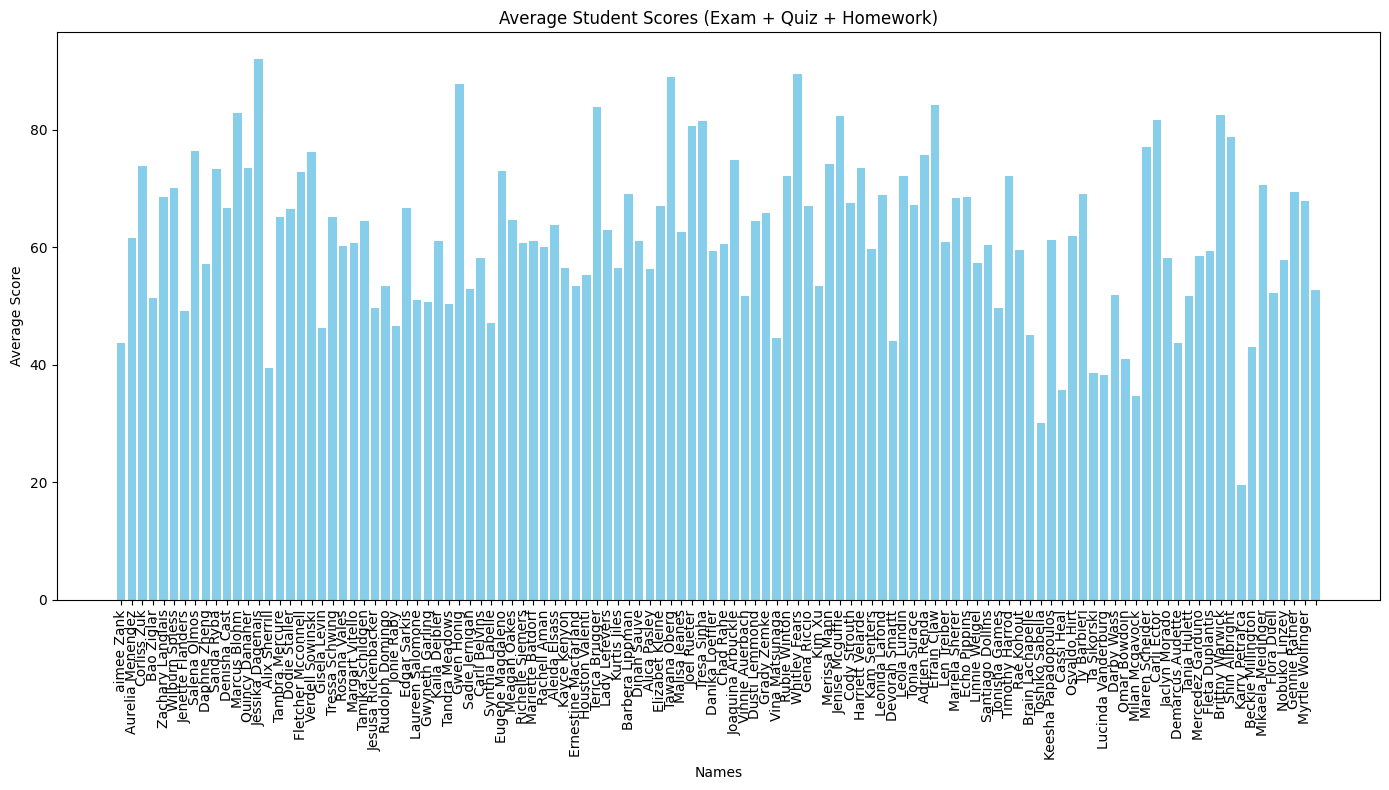

In [ ]:
# Step 3: Visualize the data with bar chart

plt.figure(figsize=(14,8))
plt.bar(names, avg_scores, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Average Score")
plt.xlabel("Names")
plt.title("Average Student Scores (Exam + Quiz + Homework)")
plt.tight_layout()
plt.show()

* Above bar chart tells More students average scores are maximum is above 40
* X-axis represents students names and y- axis is Average scores.

In [7]:
# Create DataFrame

df = pd.DataFrame({
    "name": names,
    "avg_score": avg_scores
})

print(df.head(10))

               name  avg_score
0        aimee Zank  16.373316
1  Aurelia Menendez  61.539897
2       Corliss Zuk  46.538690
3        Bao Ziglar  46.235708
4  Zachary Langlais  67.798788
5    Wilburn Spiess  44.672899
6  Jenette Flanders  49.073453
7      Salena Olmos  76.465311
8      Daphne Zheng  37.572258
9        Sanda Ryba  73.361094


In [8]:
# Top 10 avarage score of students

df_top10 = df.sort_values(by="avg_score", ascending=False).head(10)
print(df_top10)

                 name  avg_score
13   Jessika Dagenais  91.983159
64      Whitley Fears  89.548790
52       Tawana Oberg  88.998594
127  Jessika Dagenais  87.799655
32         Gwen Honig  87.755434
191       Efrain Claw  84.277725
159    Terica Brugger  83.801533
11       Marcus Blohm  82.836385
104   Brittny Warwick  82.504386
182   Jenise Mcguffie  82.351903


C:\Users\pagad\AppData\Local\Temp\ipykernel_5724\748606332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="name", y="avg_score", data=df_top10, palette="viridis")


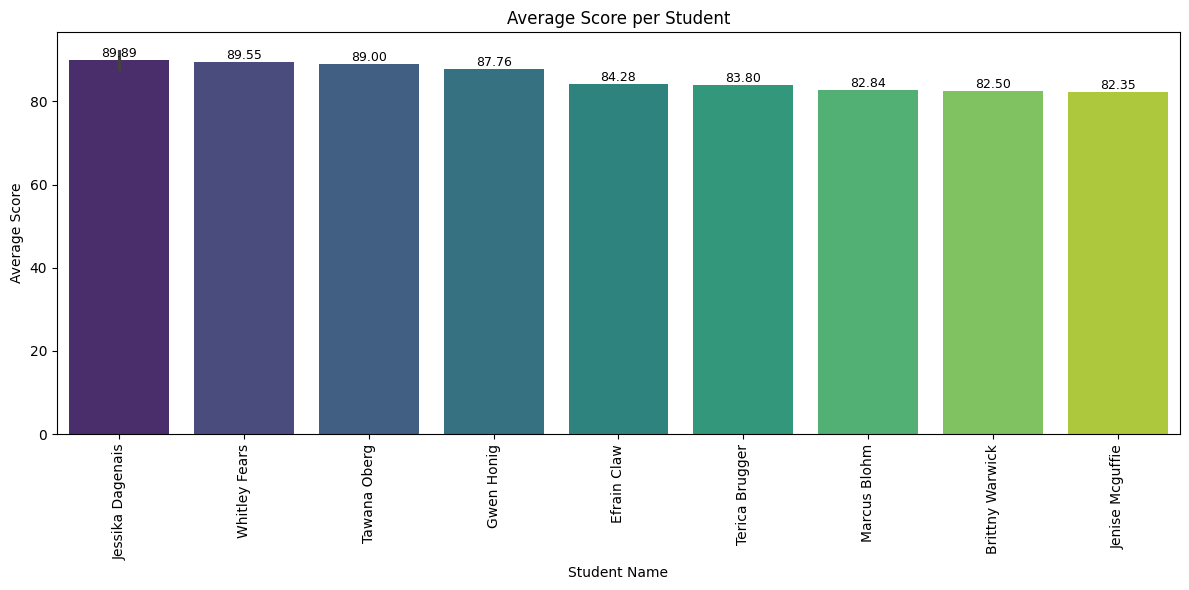

In [9]:
# Top 10 students based on the avarage scores

plt.figure(figsize=(12,6))
ax = sns.barplot(x="name", y="avg_score", data=df_top10, palette="viridis")

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",                        # format value
        (p.get_x() + p.get_width() / 2, height), # position
        ha='center', va='bottom', fontsize=9     # styling
    )

plt.xticks(rotation=90)
plt.title("Average Score per Student")
plt.ylabel("Average Score")
plt.xlabel("Student Name")
plt.tight_layout()
plt.show()


* The top highest avgerage student is Jessika Dagenais as average score is 89 and 10th student is Jenise Mcguffie  82.35
* The barplot shows colours are changed based on the average scores are reducing is clearly showed.

In [10]:
# Last 10 average score students

df_last10 = df.sort_values(by="avg_score", ascending=True).head(10)
print(df_last10)

                name  avg_score
0         aimee Zank  16.373316
106   Karry Petrarca  19.486196
168      Joel Rueter  22.226827
123       Sanda Ryba  23.757153
63      Rubie Winton  24.247820
163      Dinah Sauve  25.075981
128    Alix Sherrill  27.426552
27      Edgar Sarkis  27.552017
145   Tandra Meadows  29.187662
87   Toshiko Sabella  30.097631


C:\Users\pagad\AppData\Local\Temp\ipykernel_5724\4131045114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="name", y="avg_score", data=df_last10, palette="viridis")


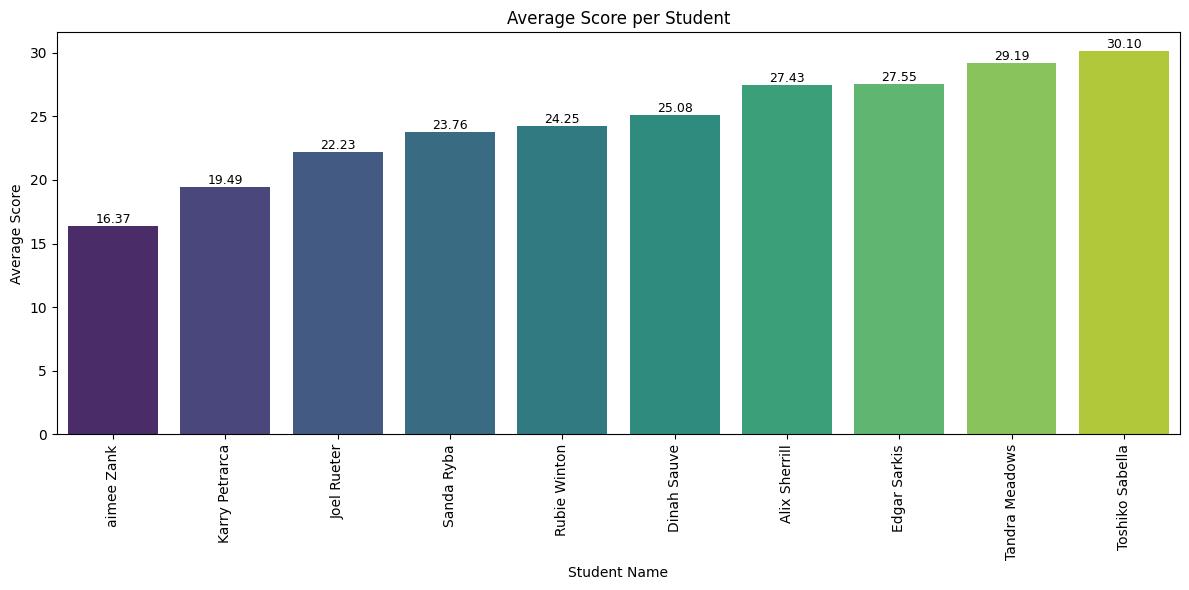

In [11]:
# Last 10 students based on the avarage score
plt.figure(figsize=(12,6))
ax = sns.barplot(x="name", y="avg_score", data=df_last10, palette="viridis")

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",                        # format value
        (p.get_x() + p.get_width() / 2, height), # position
        ha='center', va='bottom', fontsize=9     # styling
    )

plt.xticks(rotation=90)
plt.title("Average Score per Student")
plt.ylabel("Average Score")
plt.xlabel("Student Name")
plt.tight_layout()
plt.show()


* The least avgerage student is aimee Zank  16.37 and last from 10th student is Toshiko Sabella  30.09
* This barplot shows colours are changed based on the average scores are reducing is clearly showed.

In [12]:
# checking average score range of students

df["score_range"] = pd.cut(
    df["avg_score"],
    bins=[0, 50, 75, 100],
    labels=["Low", "Medium", "High"]
)


In [13]:
# count the avarage scores range
print(df["score_range"].value_counts())

score_range
Medium    106
Low        75
High       19
Name: count, dtype: int64


C:\Users\pagad\AppData\Local\Temp\ipykernel_5724\1036168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="score_range", data=df, palette="Set2")


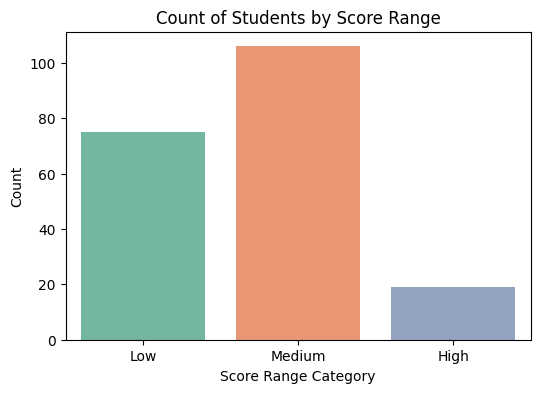

In [14]:
# Visualize the count of avarage scores range

plt.figure(figsize=(6,4))
sns.countplot(x="score_range", data=df, palette="Set2")
plt.title("Count of Students by Score Range")
plt.xlabel("Score Range Category")
plt.ylabel("Count")
plt.show()


* The above count plot shows wide range of student average scores between 0-50 is Low, 50-75 is Medium and 75-100 is High range.
* Mostly More number of students have medium range of average score like 50-75 range students are 106
* Less students have High range of average scores like 75-100 range students are 19